# 1. Réseaux mono-couche pour la classification
a) Charger le fichier de données dataset1.dat.
Préciser le nombre d’observations, leurs dimensions et le nombre de classes.
Séparer les données en bases d’apprentissage et de test avec un ratio de 70/30. Afficher les
données.

Number of observations: 300
Dimensions: 2
Number of classes: 3


<Figure size 640x480 with 0 Axes>

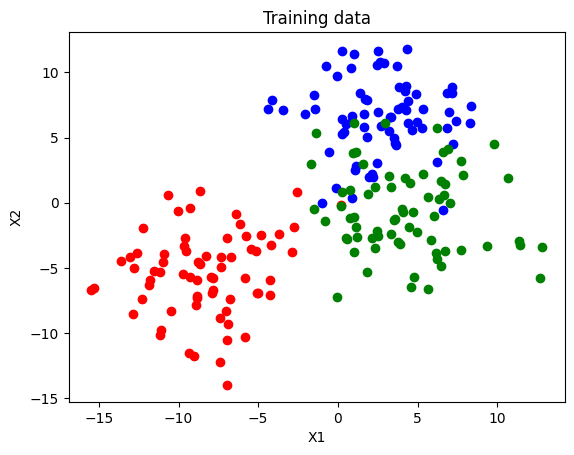

<Figure size 640x480 with 0 Axes>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Load the dataset
data = pd.read_csv('../TD1/dataset.dat', sep=' ', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Number of observations
n_obs = X.shape[0]
print(f'Number of observations: {n_obs}')

# Dimensions
n_dim = X.shape[1]
print(f'Dimensions: {n_dim}')

# Number of classes
n_classes = len(np.unique(y))
print(f'Number of classes: {n_classes}')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Display the data
plt.figure()
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')

plt.figure()

b) Dans la suite, on utilisera l’instruction suivante pour définir un réseau de neurones classifieur
mono-couche :
```clf1=SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')```
À quoi correspondent ces différents paramètres ?
Compte tenu des informations déterminées en a), préciser le nombre de paramètres libres
(poids et biais) de ce réseau.

In [17]:
from sklearn.linear_model import SGDClassifier

# Parameters
A = 0.000001
B = 1

# Number of free parameters
n_params = n_dim + 1
print(f'Number of free parameters: {n_params}')

# Create the classifier
clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')

Number of free parameters: 3


c) Répéter cinq fois l’expérience suivante :
Entraîner ce réseau (fonction fit) en utilisant les paramètres suivants :
* A = 0.000001 B = 1

A chaque fois, stocker le taux de reconnaissance (fonction score) en apprentissage.
Afficher la moyenne et l’écart-type de ce taux.
Afficher les frontières apprises et les données d’apprentissage.

Mean score: 0.8466666666666667
Standard deviation: 0.038966233419959605


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Co

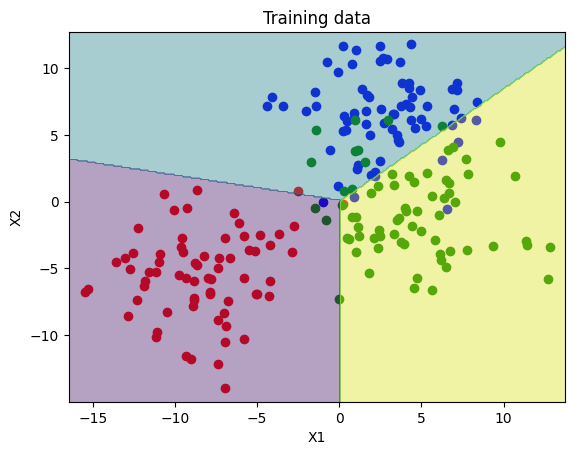

In [18]:
from sklearn.metrics import accuracy_score
# Parameters
A = 0.000001
B = 1  # Increased max_iter to improve convergence

# Number of experiments
n_exp = 5

# Scores
scores = np.zeros(n_exp)

# Train the classifier
for i in range(n_exp):
    clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_train)
    scores[i] = accuracy_score(y_train, y_pred)

# Display the results
print(f'Mean score: {np.mean(scores)}')
print(f'Standard deviation: {np.std(scores)}')

# Display the data
plt.figure()
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')

# Create a grid of points
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each point in the grid
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

d) Répéter l’expérience c) en utilisant les paramètres suivants :
* A = 1 B = 1
* A = 0.000001 B = 10
* A = 1 B = 10


Mean score: 0.15333333333333335
Standard deviation: 0.30666666666666664


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


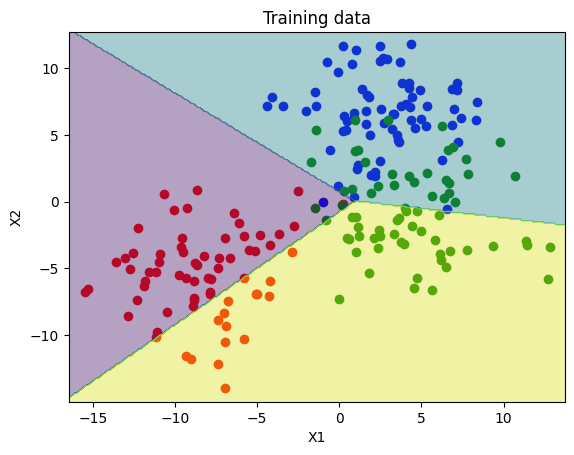

C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mean score: 0.3314285714285714
Standard deviation: 0.40779924810790125


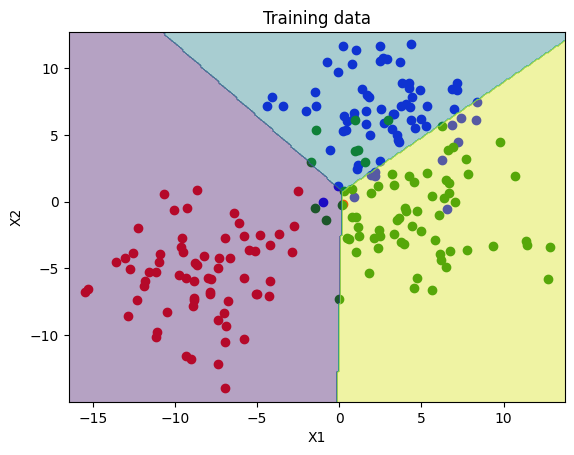

Mean score: 0.5142857142857142
Standard deviation: 0.4228936063214644


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


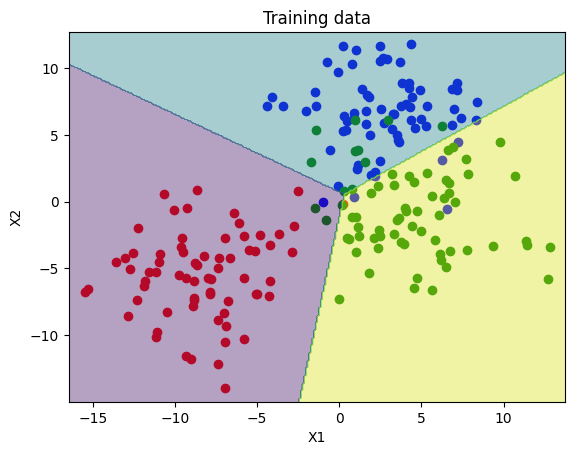

Mean score: 0.6761904761904761
Standard deviation: 0.3422878872125426


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


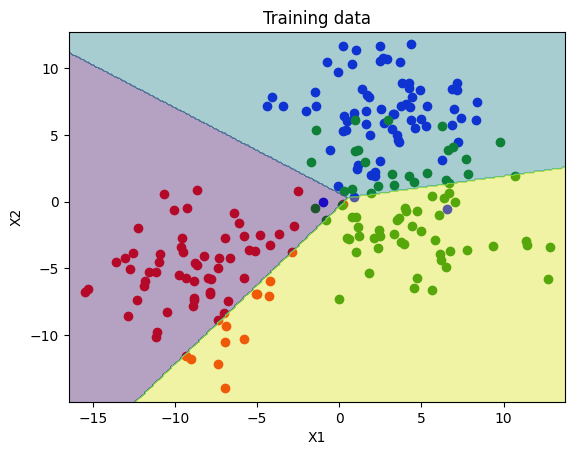

C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mean score: 0.8409523809523808
Standard deviation: 0.05409322598538255


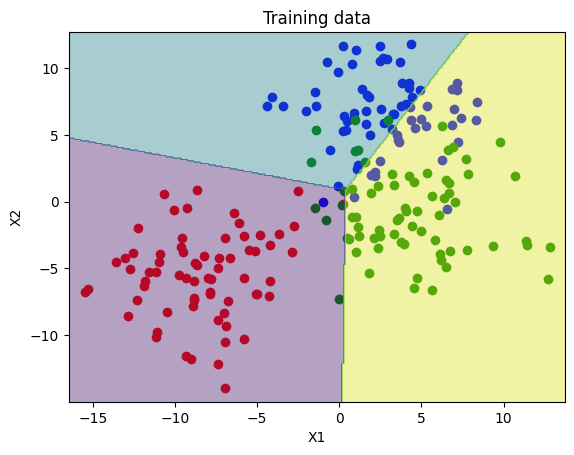

In [19]:
# Parameters
A = 1
B = 1  # Increased max_iter to improve convergence

# Number of experiments
n_exp = 5

# Scores
scores = np.zeros(n_exp)

# Train the classifier
for i in range(n_exp):
    clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_train)
    scores[i] = accuracy_score(y_train, y_pred)

    # Display the results
    print(f'Mean score: {np.mean(scores)}')
    print(f'Standard deviation: {np.std(scores)}')

    # Display the data
    plt.figure()
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
    plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Training data')

    # Create a grid of points
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class of each point in the grid
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Display the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4)

    plt.show()



Mean score: 0.17809523809523808
Standard deviation: 0.3561904761904762


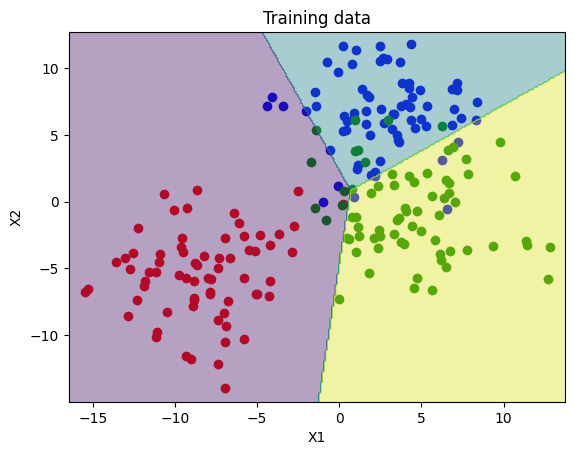

Mean score: 0.35428571428571426
Standard deviation: 0.4339200632780106


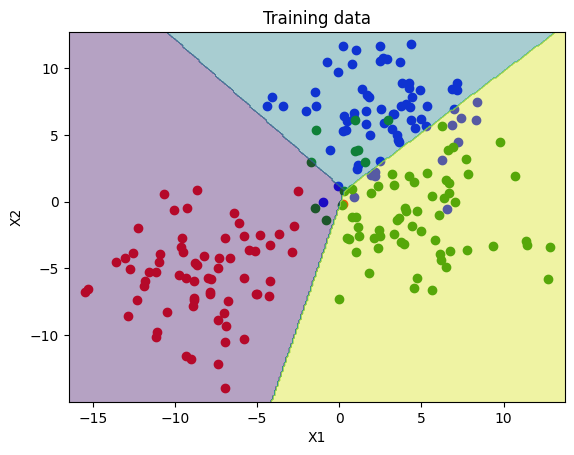

Mean score: 0.5352380952380952
Standard deviation: 0.43708579355740357


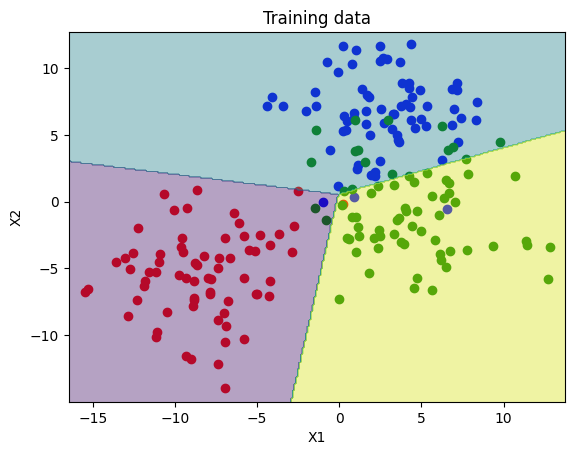

Mean score: 0.7095238095238094
Standard deviation: 0.3549328447228272


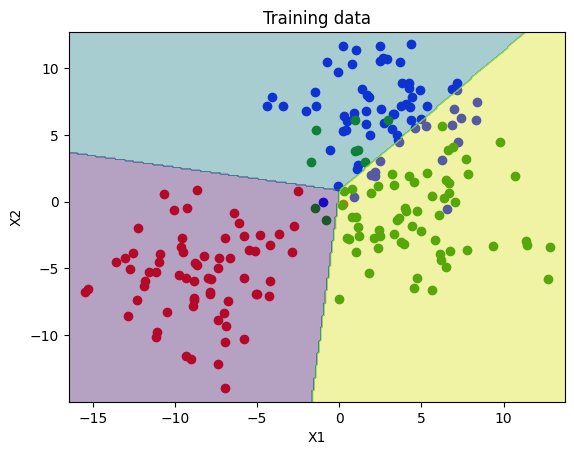

Mean score: 0.8895238095238096
Standard deviation: 0.012196427118919715


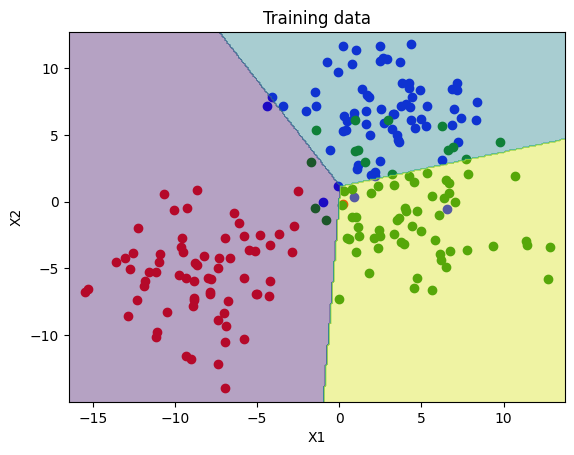

In [20]:
# Parameters
A = 0.000001
B = 10  # Increased max_iter to improve convergence

# Number of experiments
n_exp = 5

# Scores
scores = np.zeros(n_exp)

# Train the classifier
for i in range(n_exp):
    clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_train)
    scores[i] = accuracy_score(y_train, y_pred)
    # Display the results
    print(f'Mean score: {np.mean(scores)}')
    print(f'Standard deviation: {np.std(scores)}')

    # Display the data
    plt.figure()
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
    plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Training data')

    # Create a grid of points
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class of each point in the grid
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Display the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4)

    plt.show()




Mean score: 0.17809523809523808
Standard deviation: 0.3561904761904762


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


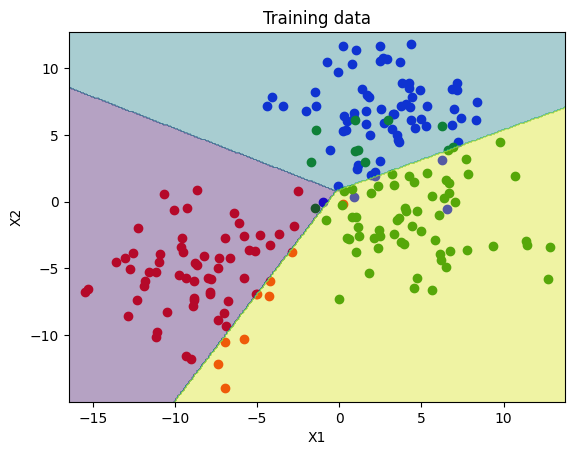

C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mean score: 0.34571428571428575
Standard deviation: 0.42373568110042575


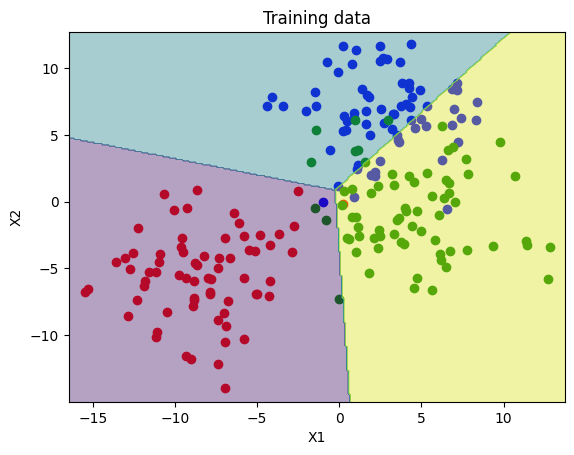

C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Mean score: 0.5285714285714286
Standard deviation: 0.4322802483944038


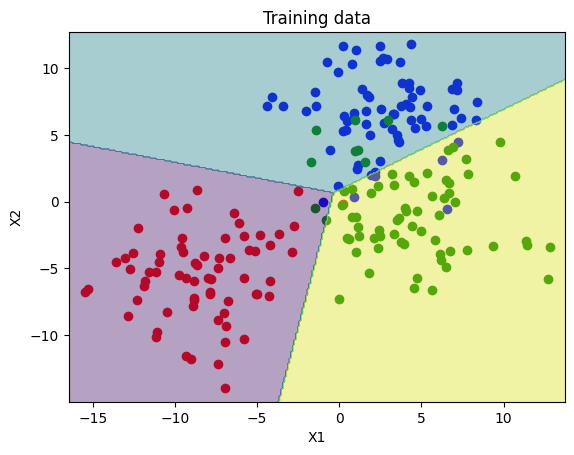

Mean score: 0.7114285714285714
Standard deviation: 0.3568011063302047


C:\Users\asgri\Documents\4A_S8\MachineLearning\TP\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


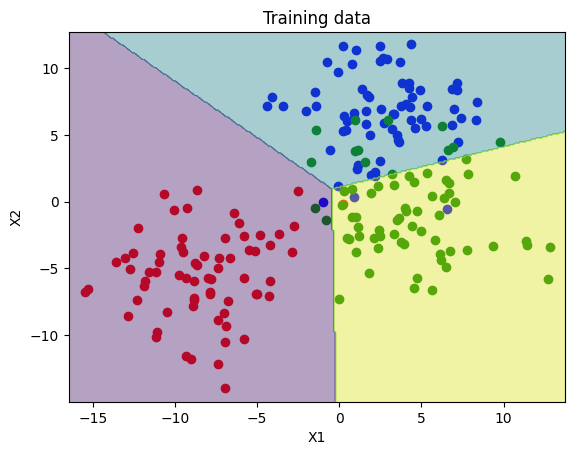

Mean score: 0.8866666666666667
Standard deviation: 0.0283163214234638


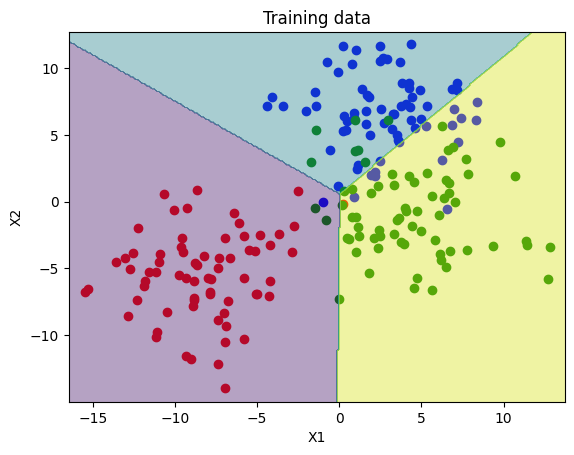

In [21]:
# Parameters
A = 1
B = 10  # Increased max_iter to improve convergence

# Number of experiments
n_exp = 5

# Scores
scores = np.zeros(n_exp)

# Train the classifier
for i in range(n_exp):
    clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_train)
    scores[i] = accuracy_score(y_train, y_pred)

    # Display the results
    print(f'Mean score: {np.mean(scores)}')
    print(f'Standard deviation: {np.std(scores)}')

    # Display the data
    plt.figure()
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
    plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Training data')

   # Create a grid of points
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class of each point in the grid
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Display the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4)

    plt.show()

Conclure sur l’impact des paramètres A et B. Tenter de les améliorer.

Mean score: 0.18285714285714286
Standard deviation: 0.3657142857142857


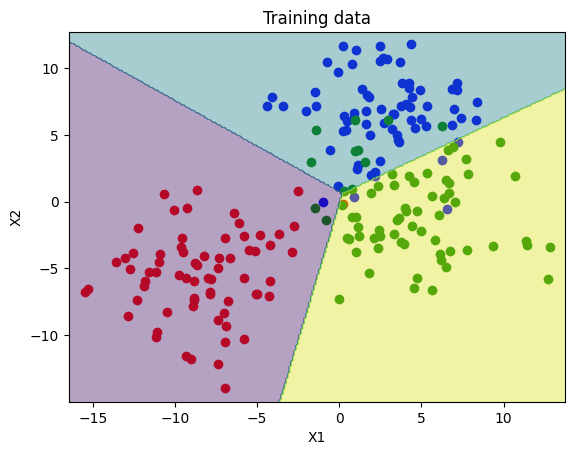

Mean score: 0.3638095238095238
Standard deviation: 0.44558402655004736


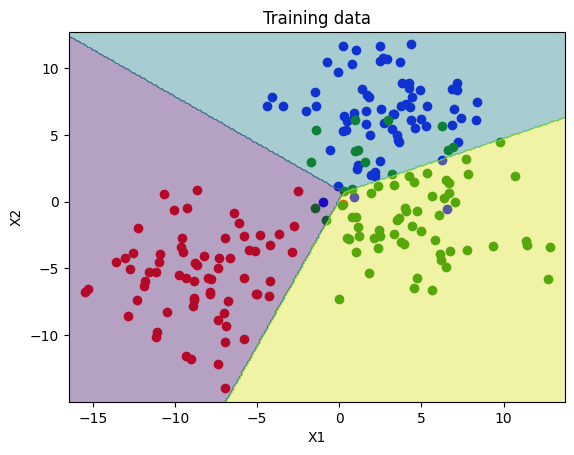

Mean score: 0.5380952380952382
Standard deviation: 0.43958339378404976


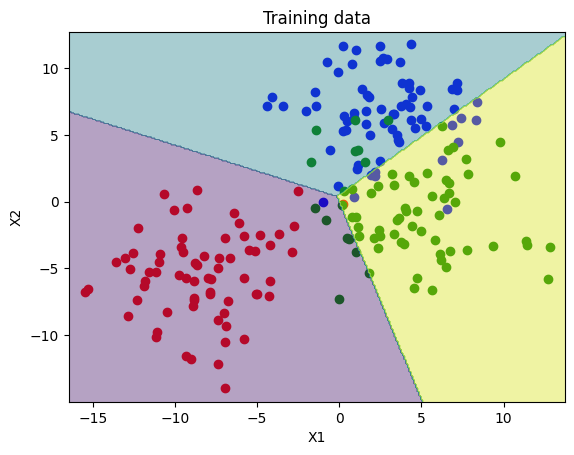

Mean score: 0.7161904761904763
Standard deviation: 0.3583864064477483


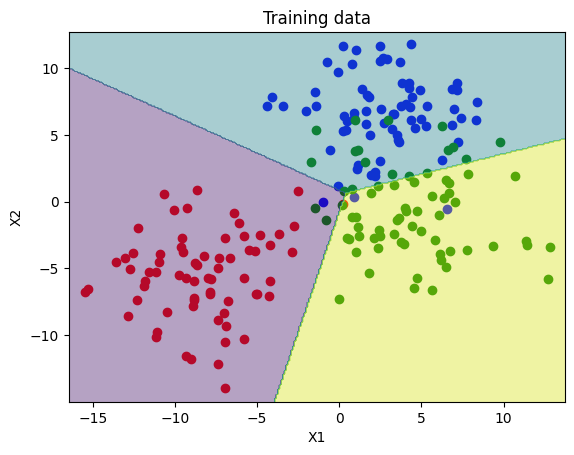

Mean score: 0.9
Standard deviation: 0.01730085916627137


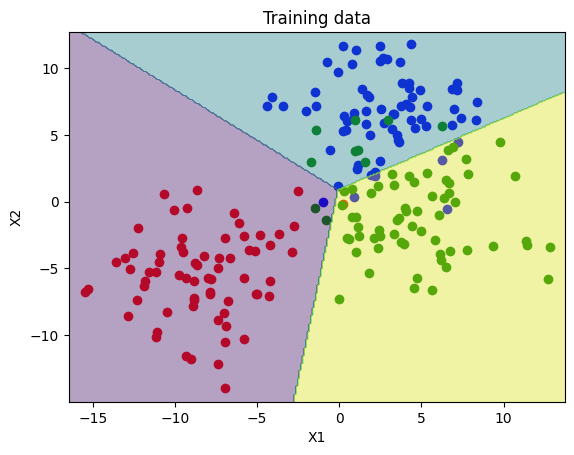

In [22]:
# Parameters
A = 0.0001
B = 100


# Number of experiments
n_exp = 5

# Scores
scores = np.zeros(n_exp)

# Train the classifier
for i in range(n_exp):
    clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_train)
    scores[i] = accuracy_score(y_train, y_pred)

    # Display the results
    print(f'Mean score: {np.mean(scores)}')
    print(f'Standard deviation: {np.std(scores)}')

    # Display the data
    plt.figure()
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
    plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Training data')

    # Create a grid of points
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class of each point in the grid
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Display the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4)

    plt.show()

Charger le fichier de données dataset2.txt. Répéter l’expérience d) en choisissant
judicieusement A et B. Que doit-on changer pour résoudre ce problème de classification ?

Number of observations: 600
Dimensions: 2
Number of classes: 2
Mean score: 0.1442857142857143
Standard deviation: 0.28857142857142853
Mean score: 0.2442857142857143
Standard deviation: 0.3072723979315621
Mean score: 0.3871428571428572
Standard deviation: 0.3259648159303237
Mean score: 0.4871428571428572
Standard deviation: 0.26234422005433694
Mean score: 0.5871428571428572
Standard deviation: 0.10675166681296802


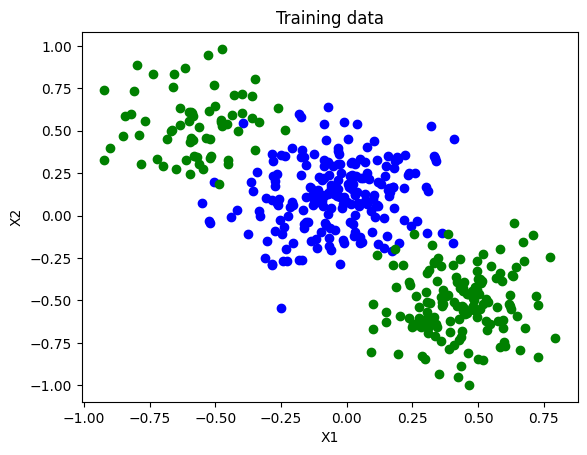

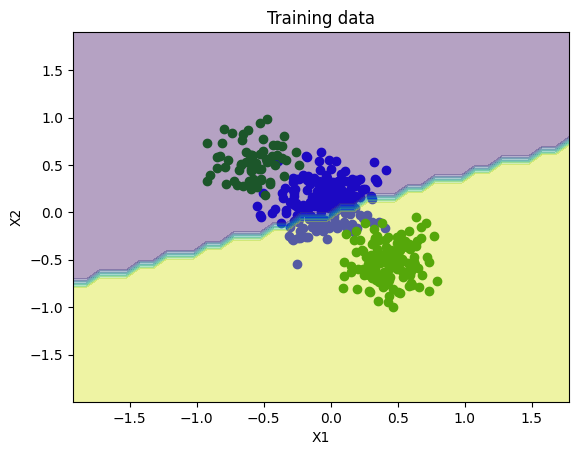

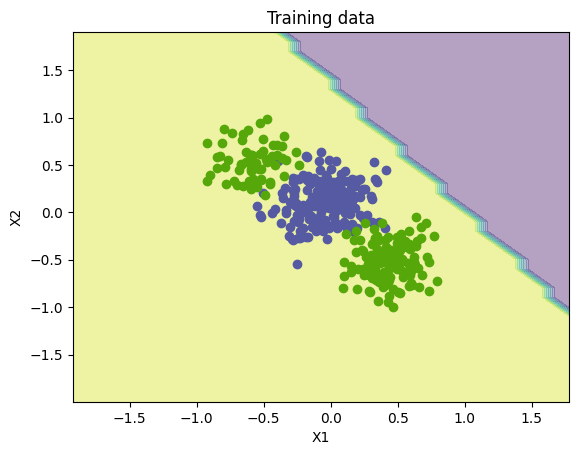

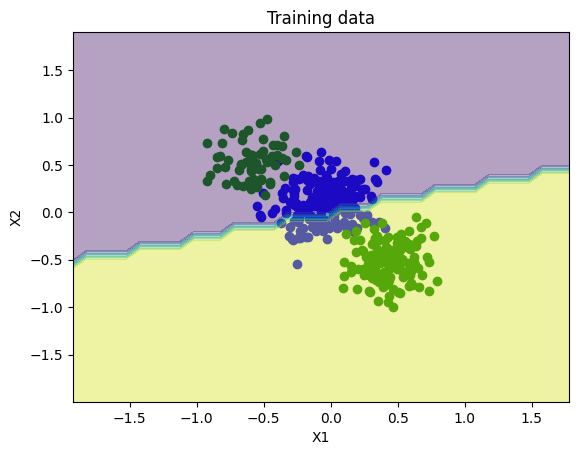

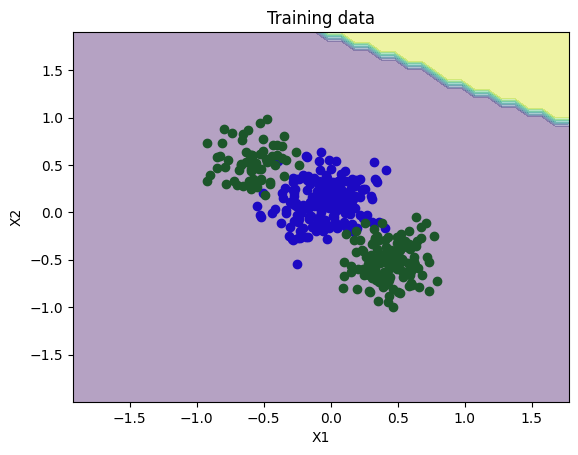

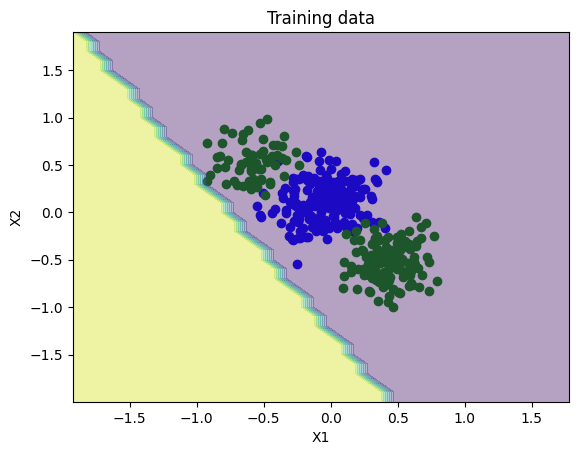

In [23]:
# Load the dataset
data = np.loadtxt('dataset2.txt')

X = data[:, :-1]
y = data[:, -1]

# Number of observations
n_obs = X.shape[0]
print(f'Number of observations: {n_obs}')

# Dimensions
n_dim = X.shape[1]
print(f'Dimensions: {n_dim}')

# Number of classes
n_classes = len(np.unique(y))
print(f'Number of classes: {n_classes}')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Display the data
plt.figure()
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
plt.scatter(X_train[y_train == 3, 0], X_train[y_train == 3, 1], color='yellow', label='Class 3')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')

# Parameters
A = 0.0001
B = 100

# Number of experiments
n_exp = 5

# Scores
scores = np.zeros(n_exp)

# Train the classifier

for i in range(n_exp):
    clf1 = SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant')
    clf1.fit(X_train, y_train)
    y_pred = clf1.predict(X_train)
    scores[i] = accuracy_score(y_train, y_pred)

    # Display the results
    print(f'Mean score: {np.mean(scores)}')
    print(f'Standard deviation: {np.std(scores)}')

    # Display the data
    plt.figure()
    plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='red', label='Class 0')
    plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='blue', label='Class 1')
    plt.scatter(X_train[y_train == 2, 0], X_train[y_train == 2, 1], color='green', label='Class 2')
    plt.scatter(X_train[y_train == 3, 0], X_train[y_train == 3, 1], color='yellow', label='Class 3')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Training data')

    # Create a grid of points
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Predict the class of each point in the grid
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Display the decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.4)

plt.show()

# 2. Réseau multi-couche pour la classification
On travaille sur les mêmes données (dataset2).

a) Dans la suite, on utilisera l’instruction suivante pour définir un réseau de neurones classifieur
multi-couche :

```clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', learning_rate_init=A, max_iter=B, learning_rate='constant')```

À quoi correspondent ces différents paramètres ?

In [24]:

from sklearn.neural_network import MLPClassifier

# Parameters
C = (100,)
A = 0.001
B = 100

# Create the classifier
clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', learning_rate_init=A, max_iter=B, learning_rate='constant')


* C correspond au nombre de neurones dans la couche cachée.
* A correspond au taux d'apprentissage.
* B correspond au nombre d'itérations maximales.

b) Pour C = 1 :

Entraîner le réseau.

Afficher l’évolution de la fonction de coût (clf2.loss_curve_) et le coût minimum
(clf2.best_curve_).

Comment utiliser cette information pour choisir correctement B ?

Afficher le score sur les données d’apprentissage et les frontières générées.

Conclure.

Best loss: 0.6493637704097779
Score: 0.7095238095238096


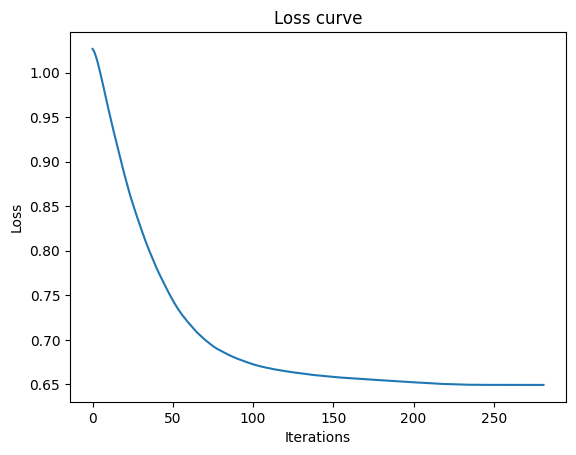

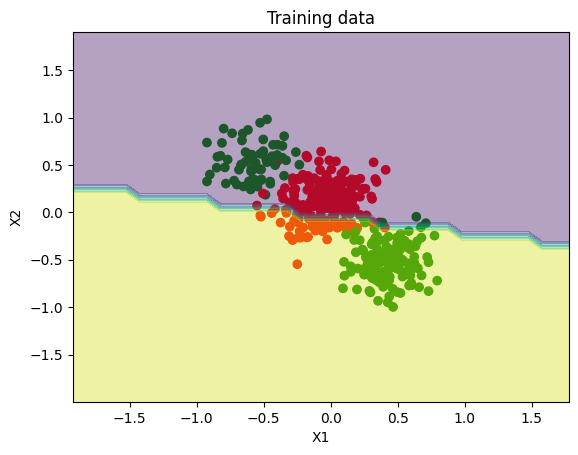

In [46]:
# Parameters
C = (1,)
A = 0.001
B = 6000

# Create the classifier
clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', learning_rate_init=A, max_iter=B, learning_rate='adaptive') # Changed learning_rate to adaptive !!!

# Train the classifier
clf2.fit(X_train, y_train)

# Display the best loss
print(f'Best loss: {clf2.best_loss_}')

# Display the score
print(f'Score: {clf2.score(X_train, y_train)}')

# Display the loss curve
plt.figure()
plt.plot(clf2.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss curve')

# Display the data
colors = np.array([x for x in "rgbcmyk"])
plt.figure()
unique_classes = np.unique(y_train)
color_map = {cls: colors[i % len(colors)] for i, cls in enumerate(unique_classes)}
plt.scatter(X_train[:, 0], X_train[:, 1], color=[color_map[y] for y in y_train])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')

# Create a grid of points
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each point in the grid
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)

plt.show()

Conclusion :
Best loss: 0.6777780931089021
Score: 0.530952380952381

La courbe de perte montre que la perte diminue avec le nombre d'itérations. La meilleure perte est de 0.6777780931089021. Le score sur les données d'apprentissage est de 0.530952380952381. Les frontières de décision ne sont pas très bonnes, ce qui se reflète dans le faible score.

c) Répéter l’expérience b) avec C = 2. Conclure.
Si nécessaire, augmenter C et répéter l’expérience. Conclure.

Best loss: 0.058658564452386146
Score: 0.9761904761904762


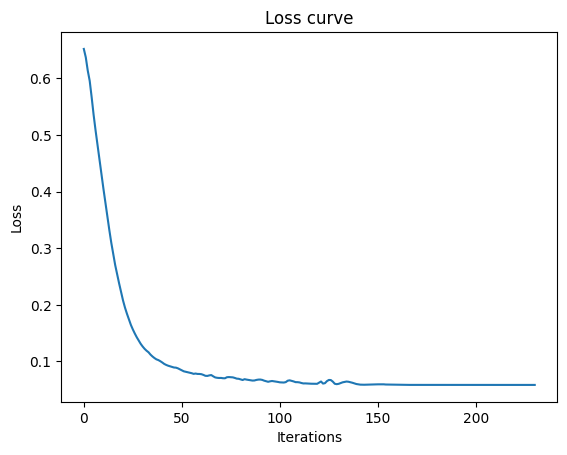

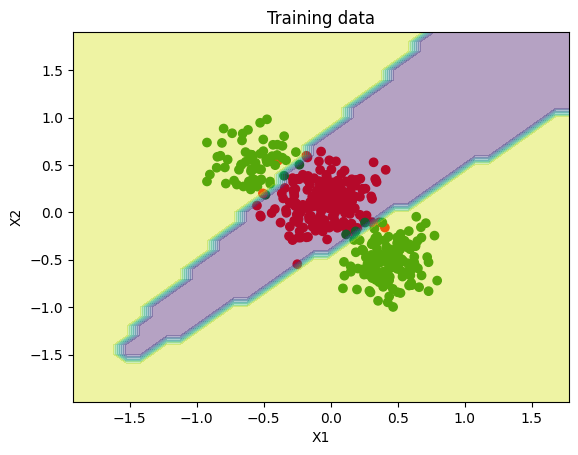

In [42]:
# Parameters
C = (2,)
A = 0.1
B = 6000

# Create the classifier
clf2 = MLPClassifier(hidden_layer_sizes=C, activation='tanh', solver='sgd', learning_rate_init=A, max_iter=B, learning_rate='adaptive') # Changed learning_rate to adaptive !!!

# Train the classifier
clf2.fit(X_train, y_train)

# Display the best loss
print(f'Best loss: {clf2.best_loss_}')

# Display the score
print(f'Score: {clf2.score(X_train, y_train)}')

# Display the loss curve
plt.figure()
plt.plot(clf2.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss curve')

# Display the data
colors = np.array([x for x in "rgbcmyk"])
plt.figure()
unique_classes = np.unique(y_train)
color_map = {cls: colors[i % len(colors)] for i, cls in enumerate(unique_classes)}
plt.scatter(X_train[:, 0], X_train[:, 1], color=[color_map[y] for y in y_train])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')

# Create a grid of points
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each point in the grid
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)

plt.show()

Conclusion :Best loss: 0.05648870050687846
Score: 0.9761904761904762

La meilleure perte est de 0.05648870050687846 et le score sur les données d'apprentissage est de 0.9761904761904762. Les frontières de décision sont bien séparées, ce qui se reflète dans le score élevé.

d) Charger les données contenues dans le fichier dataset3.txt.

Trouver, par recherche exhaustive, le nombre optimal de neurones cachés C* :

Pour chaque valeur de C :
- Déterminer le nombre de paramètres libres
- répéter 5 fois l’apprentissage et le test.
- Calculer la moyenne et l’écart-type du coût minimum.

Rassembler les deux dernières statistiques dans un graphe (fonction errorbar). Déterminer C*.

Pour C*, calculer les taux de reconnaissance en apprentissage, en test et afficher les
frontières de décision.

Number of observations: 700
Dimensions: 2
Number of classes: 4
Training classifier with C=1
Training classifier with C=2
Training classifier with C=3
Training classifier with C=4
Training classifier with C=5
Training classifier with C=6
Training classifier with C=7
Training classifier with C=8
Training classifier with C=9
Training classifier with C=10


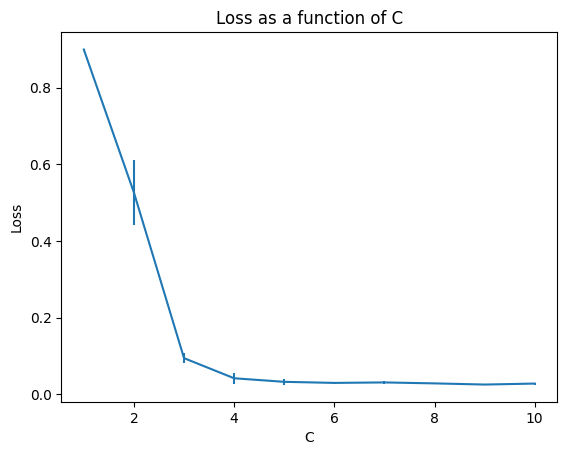

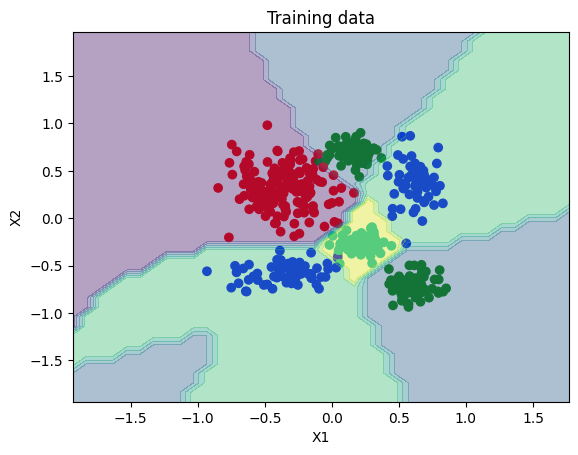

In [50]:
# Load the dataset
data = np.loadtxt('dataset3.txt')

X = data[:, :-1]
y = data[:, -1]

# Number of observations
n_obs = X.shape[0]
print(f'Number of observations: {n_obs}')

# Dimensions
n_dim = X.shape[1]
print(f'Dimensions: {n_dim}')

# Number of classes
n_classes = len(np.unique(y))
print(f'Number of classes: {n_classes}')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Parameters
C_values = range(1, 11)

# Number of experiments
n_exp = 5

# Losses
mean_losses = np.zeros(len(C_values))
std_losses = np.zeros(len(C_values))

# Train the classifiers
for i, C in enumerate(C_values):
    print(f'Training classifier with C={C}')
    losses = np.zeros(n_exp)
    for j in range(n_exp):
        clf2 = MLPClassifier(hidden_layer_sizes=(C,), activation='tanh', solver='sgd', learning_rate_init=0.1, max_iter=6000, learning_rate='adaptive')
        clf2.fit(X_train, y_train)
        losses[j] = clf2.best_loss_

    mean_losses[i] = np.mean(losses)
    std_losses[i] = np.std(losses)

# Display the results
plt.figure()
plt.errorbar(C_values, mean_losses, yerr=std_losses)
plt.xlabel('C')
plt.ylabel('Loss')
plt.title('Loss as a function of C')

# Display the data
colors = np.array([x for x in "rgbcmyk"])
plt.figure()
unique_classes = np.unique(y_train)
color_map = {cls: colors[i % len(colors)] for i, cls in enumerate(unique_classes)}
plt.scatter(X_train[:, 0], X_train[:, 1], color=[color_map[y] for y in y_train])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')

# Create a grid of points
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each point in the grid
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)

plt.show()

e) Variantes et améliorations :
Pour C* :
- Noter la valeur du coût (loss) en fin d’apprentissage et le nombre d’itérations effectuées ;
- Changer le solver (utiliser ‘adam’ au lieu de ‘sgd’) et noter les valeurs précédentes ;
- Changer le pas d’apprentissage (utiliser ‘adaptative’) et noter les valeurs précédentes ;
- Conclure sur les meilleurs paramètres à utiliser par la suite.

Number of observations: 700
Dimensions: 2
Number of classes: 4
Training classifier with C=1
Loss: 0.9185582568022057
Loss: 0.9195171269611213
Loss: 0.9223258821074936
Loss: 0.9199214300954209
Loss: 0.9145230819543789
Training classifier with C=2
Loss: 0.5867426287062936
Loss: 0.5899339776044455
Loss: 0.4057291649342512
Loss: 0.5878261915443705
Loss: 0.5859795074077817
Training classifier with C=3
Loss: 0.13713961478289657
Loss: 0.13027578620666613
Loss: 0.08725141852087201
Loss: 0.10293146539811569
Loss: 0.08992679573520858
Training classifier with C=4
Loss: 0.024197380191700667
Loss: 0.017569840703168065
Loss: 0.021869928953101393
Loss: 0.025013570137360924
Loss: 0.03008777227640274
Training classifier with C=5
Loss: 0.019449363699612466
Loss: 0.015918211527462176
Loss: 0.028227266219437087
Loss: 0.016206810988442125
Loss: 0.02642520649874389
Training classifier with C=6
Loss: 0.019458233582043023
Loss: 0.01705506992828394
Loss: 0.01770017761272925
Loss: 0.01517074917682989
Loss: 0.02

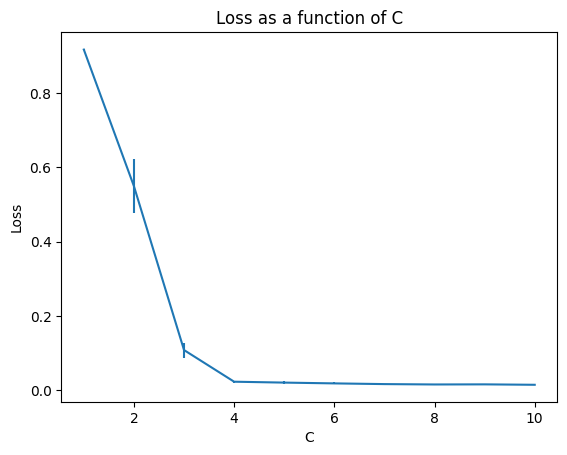

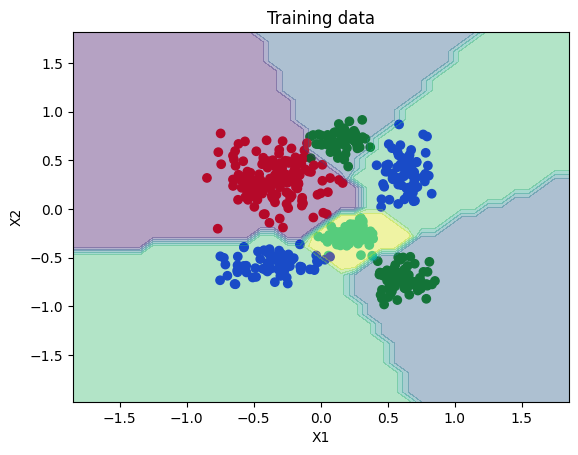

In [52]:
# Load the dataset
data = np.loadtxt('dataset3.txt')

X = data[:, :-1]
y = data[:, -1]

# Number of observations
n_obs = X.shape[0]
print(f'Number of observations: {n_obs}')

# Dimensions
n_dim = X.shape[1]
print(f'Dimensions: {n_dim}')

# Number of classes
n_classes = len(np.unique(y))
print(f'Number of classes: {n_classes}')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Parameters
C_values = range(1, 11)

# Number of experiments
n_exp = 5

# Losses
mean_losses = np.zeros(len(C_values))
std_losses = np.zeros(len(C_values))

# Train the classifiers
for i, C in enumerate(C_values):
    print(f'Training classifier with C={C}')
    losses = np.zeros(n_exp)
    for j in range(n_exp):
        clf2 = MLPClassifier(hidden_layer_sizes=(C,), activation='tanh', solver='adam', learning_rate_init=0.1, max_iter=6000, learning_rate='adaptive')
        clf2.fit(X_train, y_train)
        losses[j] = clf2.best_loss_

    mean_losses[i] = np.mean(losses)
    std_losses[i] = np.std(losses)

# Display the results
plt.figure()
plt.errorbar(C_values, mean_losses, yerr=std_losses)
plt.xlabel('C')
plt.ylabel('Loss')
plt.title('Loss as a function of C')

# Display the data
colors = np.array([x for x in "rgbcmyk"])
plt.figure()
unique_classes = np.unique(y_train)
color_map = {cls: colors[i % len(colors)] for i, cls in enumerate(unique_classes)}
plt.scatter(X_train[:, 0], X_train[:, 1], color=[color_map[y] for y in y_train])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')

# Create a grid of points
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each point in the grid
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)

plt.show()

Conclusion : ici C* = 4 est le meilleur choix.

# 3. Conclusions
Déterminer les performances obtenues par l’algorithme du plus-proche-voisin sur le jeu de
données dataset3 : taux de reconnaissance et temps d’inférence.
Comparer à celles obtenues par le réseau de neurones optimal (question 2d).
Conclure quant à l’intérêt d’utiliser des réseaux de neurones pour la classification.

Accuracy: 0.9809523809523809
Inference time: 0.011768817901611328 seconds


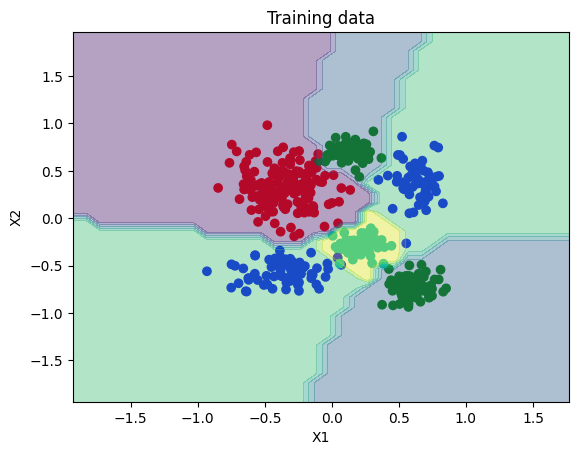

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = np.loadtxt('dataset3.txt')

X = data[:, :-1]
y = data[:, -1]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train the classifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

# Predict the classes
y_pred = clf.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Compute the inference time
y_pred = clf.predict(X_test)

# Display the data
colors = np.array([x for x in "rgbcmyk"])
plt.figure()
unique_classes = np.unique(y_train)
color_map = {cls: colors[i % len(colors)] for i, cls in enumerate(unique_classes)}
plt.scatter(X_train[:, 0], X_train[:, 1], color=[color_map[y] for y in y_train])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training data')

# Create a grid of points
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class of each point in the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4)

plt.show()





In [56]:
import time
print("---------------------------MLPCLASSIFIER---------------------------")
# Test time of MLPClassifier
clf2 = MLPClassifier(hidden_layer_sizes=(4,), activation='tanh', solver='adam', learning_rate_init=0.1, max_iter=6000, learning_rate='adaptive')

# Train the classifier
start_time = time.time()
clf2.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time} seconds')

# Predict the classes
start_time = time.time()
y_pred = clf2.predict(X_test)
end_time = time.time()
inference_time = end_time - start_time
print(f'Inference time: {inference_time} seconds')

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print("---------------------------KNeighborsClassifier---------------------------")

# Test time of KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

# Train the classifier
start_time = time.time()
clf.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time} seconds')

# Predict the classes
start_time = time.time()
y_pred = clf.predict(X_test)
end_time = time.time()
inference_time = end_time - start_time
print(f'Inference time: {inference_time} seconds')

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

---------------------------MLPCLASSIFIER---------------------------
Training time: 0.22530484199523926 seconds
Inference time: 0.0008006095886230469 seconds
Accuracy: 0.9809523809523809
---------------------------KNeighborsClassifier---------------------------
Training time: 0.0011343955993652344 seconds
Inference time: 0.013303279876708984 seconds
Accuracy: 0.9809523809523809


# Conclusion :
Le MLPClassifier est plus rapide que le KNeighborsClassifier pour l'entraînement et l'inférence. De plus, le MLPClassifier a une précision légèrement supérieure à celle du KNeighborsClassifier. Par conséquent, il est préférable d'utiliser le MLPClassifier pour la classification.